<a href="https://colab.research.google.com/github/gauravbachani/ml-kaggle/blob/main/hacakthon1_Gaurav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving House_prediction.csv to House_prediction.csv


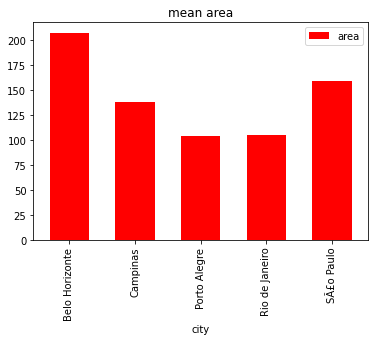

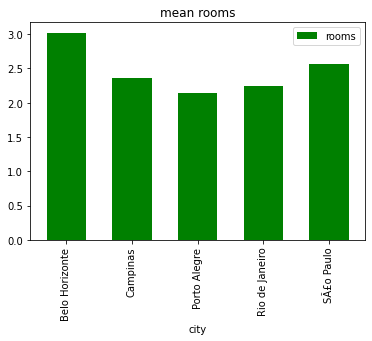

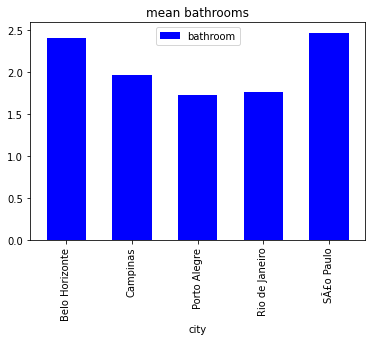

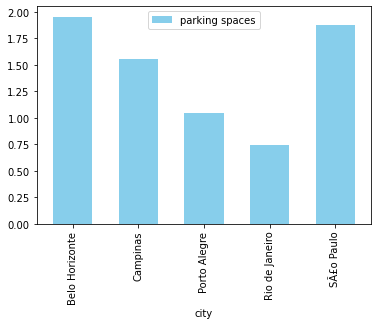

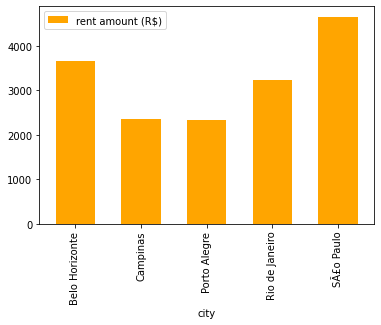

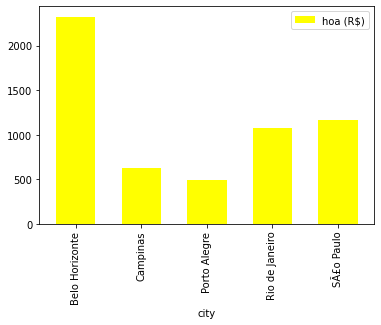

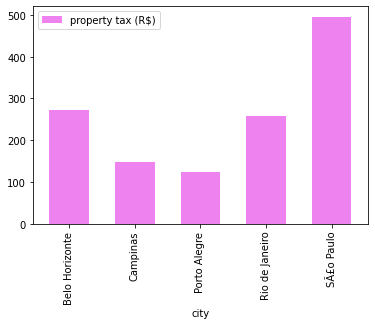

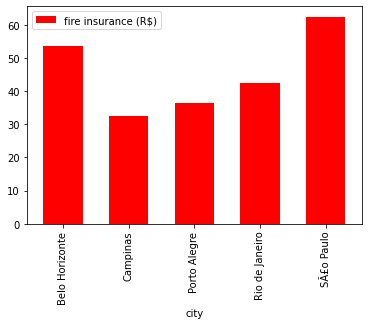

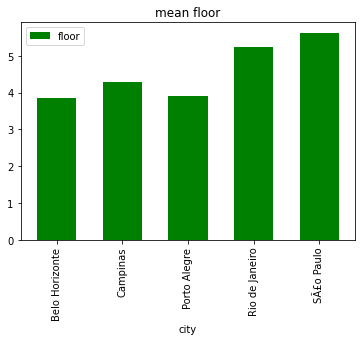

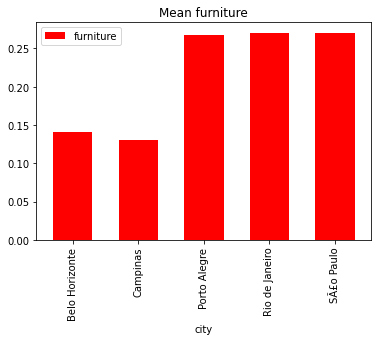

In [ ]:
# question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('House_prediction.csv')
data.groupby('city')['area',].mean().plot(kind='bar',width=0.6,color='red',title='mean area')
data.groupby('city')['rooms',].mean().plot(kind='bar',width=0.6,color='green',title='mean rooms')
data.groupby('city')['bathroom',].mean().plot(kind='bar',width=0.6,color='blue',title='mean bathrooms')
data.groupby('city')['parking spaces',].mean().plot(kind='bar',width=0.6,color='skyblue')
data.groupby('city')['rent amount (R$)',].mean().plot(kind='bar',width=0.6,color='orange')
data.groupby('city')['hoa (R$)',].mean().plot(kind='bar',width=0.6,color='yellow')
data.groupby('city')['property tax (R$)',].mean().plot(kind='bar',width=0.6,color='violet')
data.groupby('city')['fire insurance (R$)',].mean().plot(kind='bar',width=0.6,color='red')
data=data.replace(to_replace=["-","not accept","not furnished","furnished","accept"],value=[0,0,0,1,1])
cc={"floor":float}
data=data.astype(cc)
data.groupby('city')['floor',].mean().plot(kind='bar',width=0.6,color='green',title='mean floor')
data.groupby('city')['furniture',].mean().plot(kind='bar',width=0.6,color='red',title='Mean furniture')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                         area     rooms  ...  fire insurance (R$)  total (R$)
area                 1.000000  0.193796  ...             0.188078    0.051799
rooms                0.193796  1.000000  ...             0.565148    0.134597
bathroom             0.226766  0.733763  ...             0.676399    0.208339
parking spaces       0.193978  0.617516  ...             0.597343    0.148681
floor               -0.012724 -0.078687  ...             0.013652    0.036431
furniture            0.008175 -0.080694  ...             0.141768    0.037781
hoa (R$)             0.006890  0.007139  ...             0.029535    0.955024
rent amount (R$)     0.180742  0.541758  ...             0.987343    0.264490
property tax (R$)    0.039059  0.075252  ...             0.105661    0.218344
fire insurance (R$)  0.188078  0.565148  ...             1.000000    0.254911
total (R$)           0.051799  0.134597  ...             0.254911    1.000000

[11 rows x 11 columns]


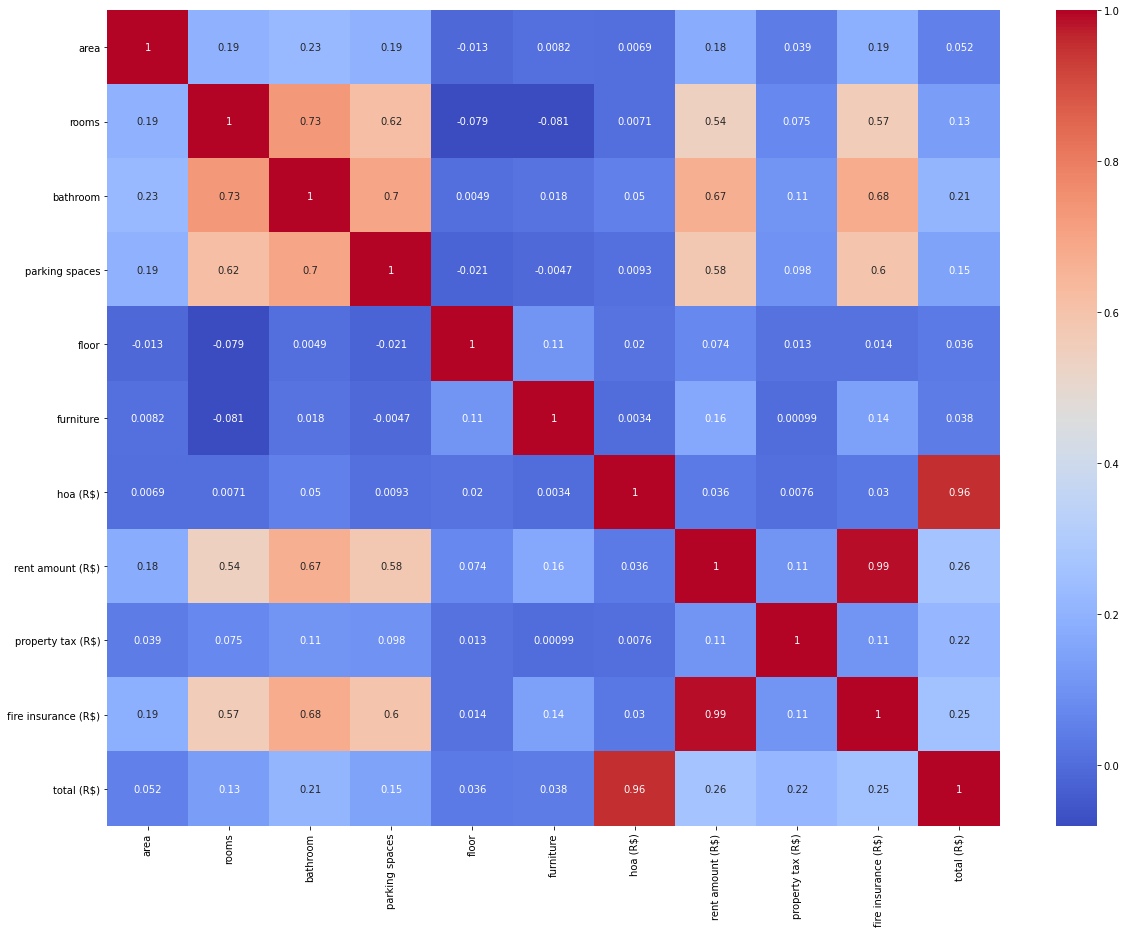

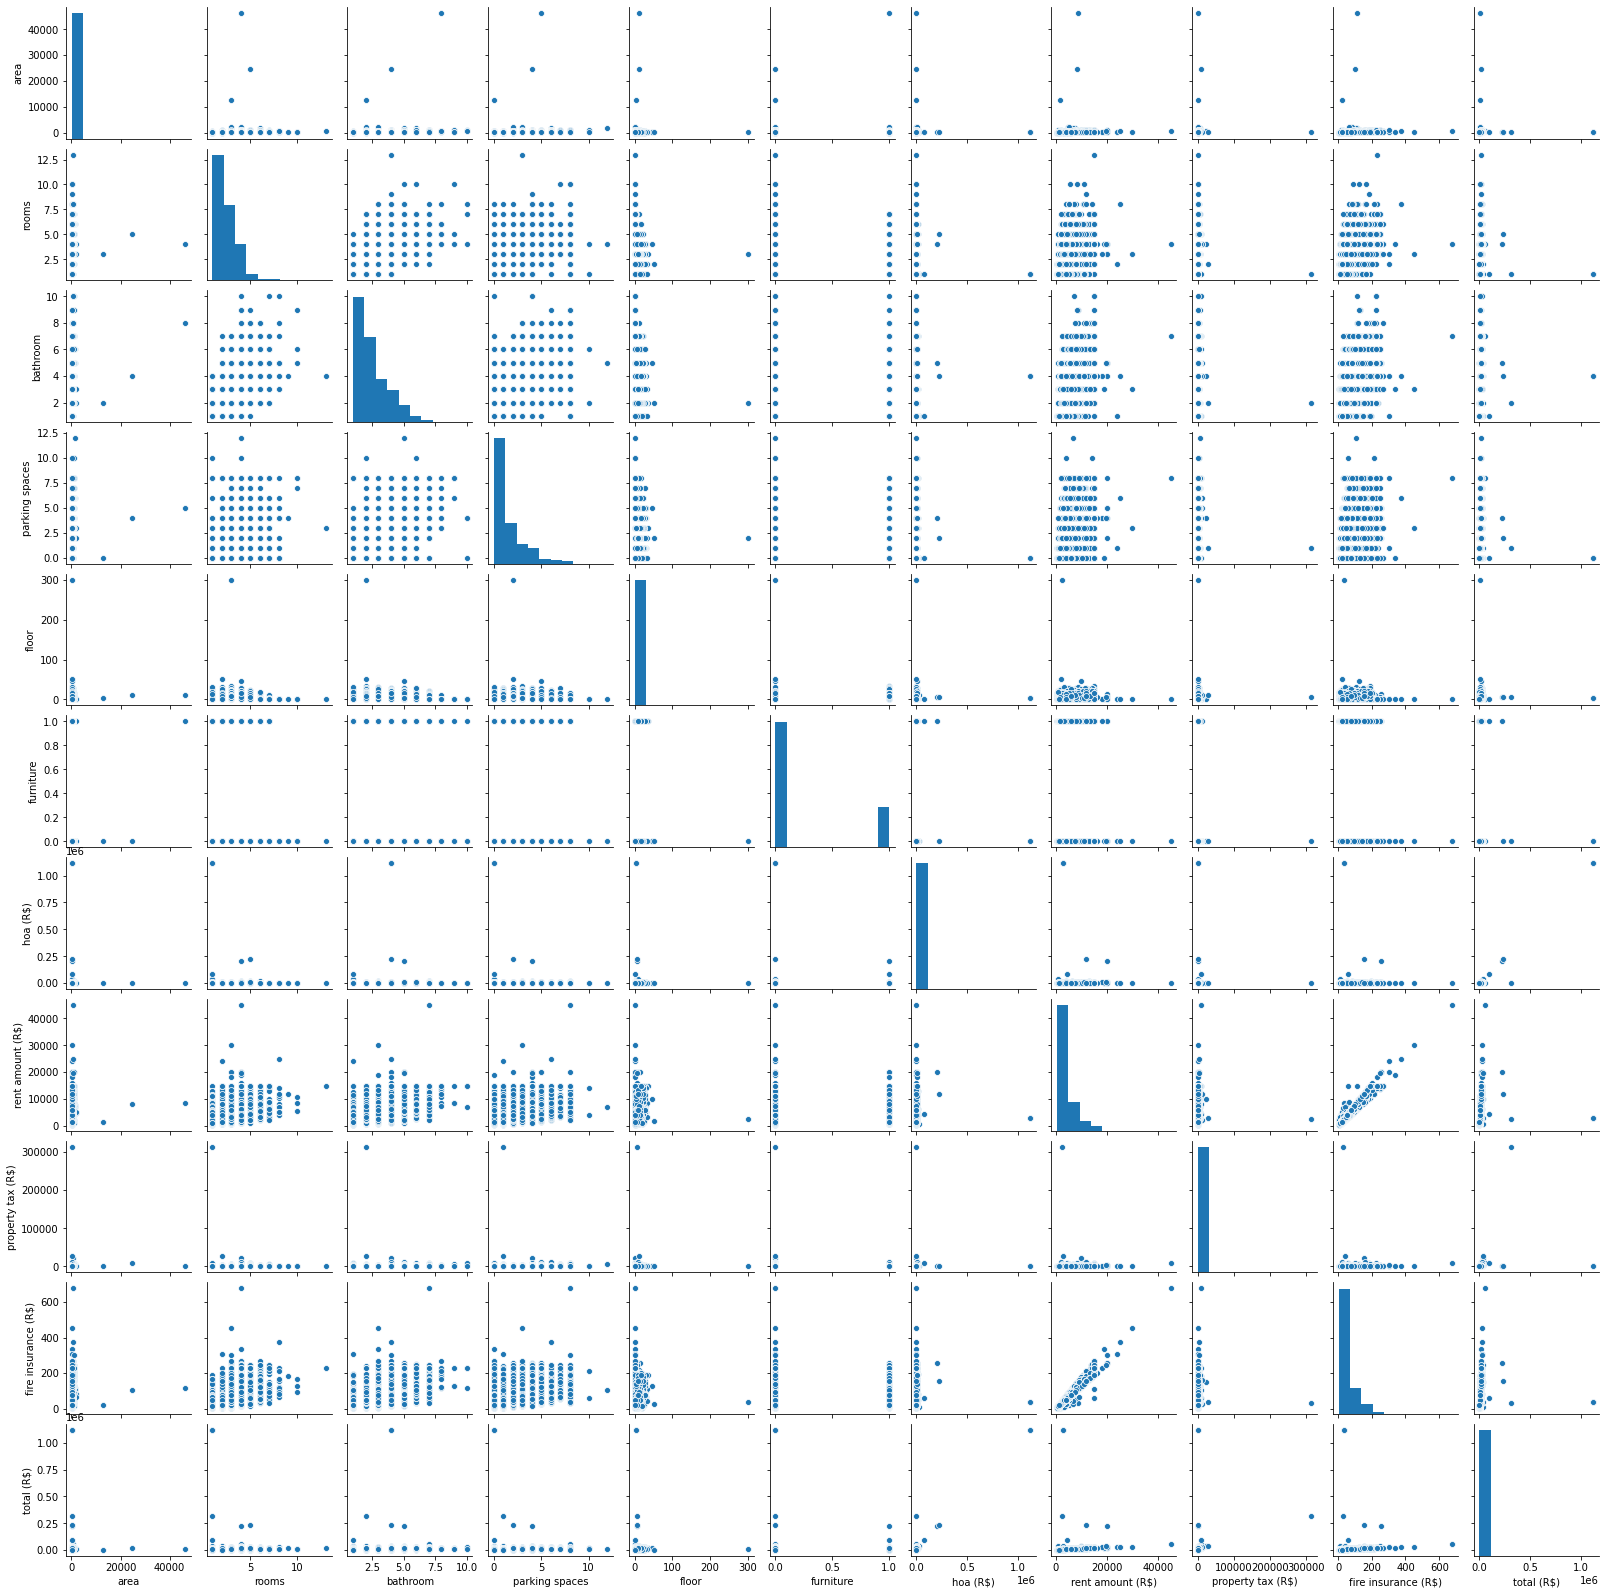

In [ ]:
# question 2
# to show corelation/depandance what i'm doing is that ,i'm calculating corelation factor between each property that will give us an idea about the depandance
# if correaaltion factor is >0 this means our y-axis value will increase on going towards positive x-axis and vice-versa
import seaborn
correlation_data=data.corr()
print(correlation_data)
plt.figure(figsize=(20,15))
seaborn.heatmap(data.corr(),annot=True,cmap="coolwarm")
# we can also get an idea of our correlation matrix through thiese plots....
data_pairplot=data.dropna()
seaborn.pairplot(data_pairplot,height=2)

     Actual     Predicted
0   10000.0  10003.565552
1    3500.0   3499.766431
2    3700.0   3699.801503
3    5010.0   5009.667415
4    5000.0   4999.724698
5    1600.0   1599.786219
6    3490.0   3489.803287
7    2000.0   2000.061510
8   15000.0  15002.072177
9    1650.0   1649.897944
10   2200.0   2199.848040
11   5000.0   4999.811218
12   3350.0   3349.929468
13   4850.0   4849.681015
14   8000.0   7995.488254
15    725.0    724.852003
16   4000.0   3999.926337
17   1550.0   1549.805189
18   9500.0   9501.829042
19   1800.0   1799.769317
20   1260.0   1260.066133
21   4250.0   4249.821868
22   2600.0   2599.926546
23   5000.0   4999.438100
24  11000.0  10996.821427
25  11500.0  11501.737824
26   3400.0   3399.883707
27   1300.0   1299.946898
28   1800.0   1799.887996
29    750.0    749.877902


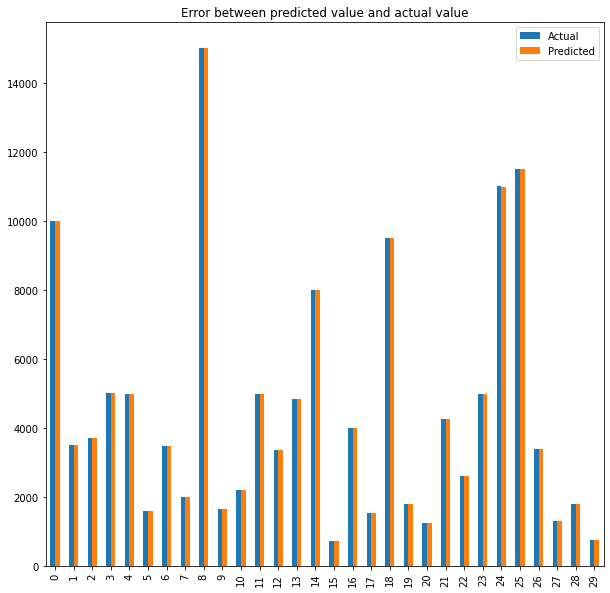

Mean Absolute Error: 0.5240368615256027
Mean Squared Error: 1.3896637697543937
Root Mean Squared Error: 1.1788400102449839


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
data.isnull().any()
data = data.fillna(method='ffill')
x=data[['area','rooms','bathroom','parking spaces','floor','hoa (R$)','property tax (R$)','fire insurance (R$)',
'total (R$)']].values
y=data['rent amount (R$)'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.0693,random_state=0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(30)
print(df1) #right now for brevity i only plotted graph for first 30 entries
df1.plot(kind='bar',figsize=(10,10))
plt.title('Error between predicted value and actual value')
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))